In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [261]:
customer = pd.read_csv('Customers.csv')

In [262]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [263]:
Region_customers = customer['Region'].value_counts()

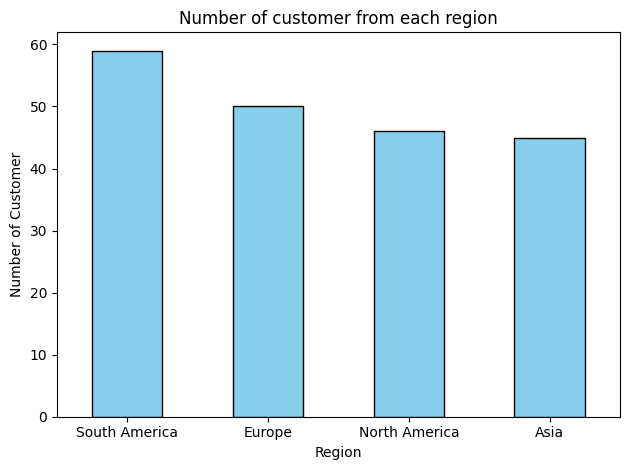

In [264]:
Region_customers.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of customer from each region')
plt.xlabel('Region')
plt.ylabel('Number of Customer')
plt.xticks(rotation=0)
plt.tight_layout()

In [265]:
date = pd.to_datetime(customer['SignupDate'])
customer['SignUp_month'] = date.dt.month
month = customer['SignUp_month'].value_counts().sort_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

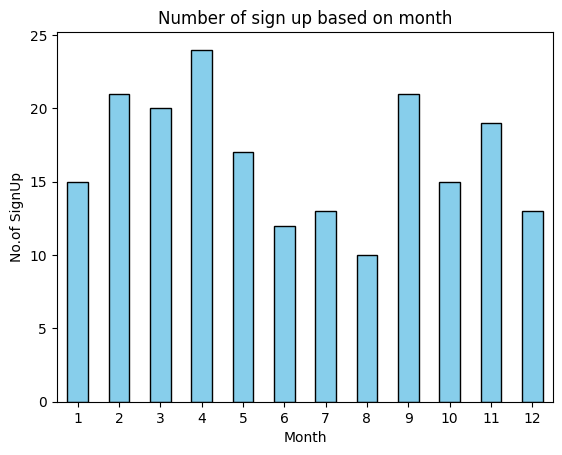

In [266]:
# Plot the bar chart
month.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Number of sign up based on month')
plt.xlabel('Month')
plt.ylabel('No.of SignUp')
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, '2024'), Text(1, 0, '2022'), Text(2, 0, '2023')])

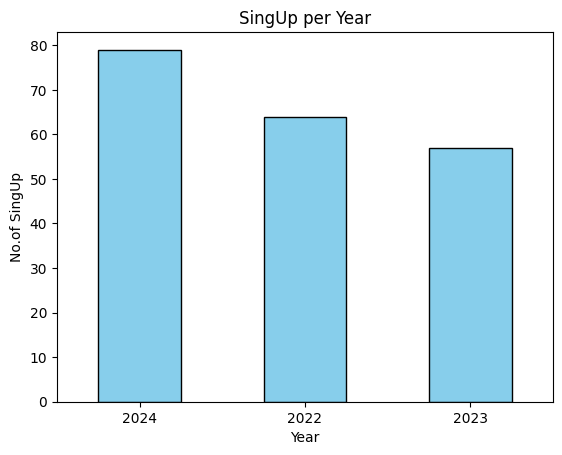

In [267]:
year = date.dt.year
year = year.value_counts()
year.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('SingUp per Year')
plt.xlabel('Year')
plt.ylabel('No.of SingUp')
plt.xticks(rotation=0)

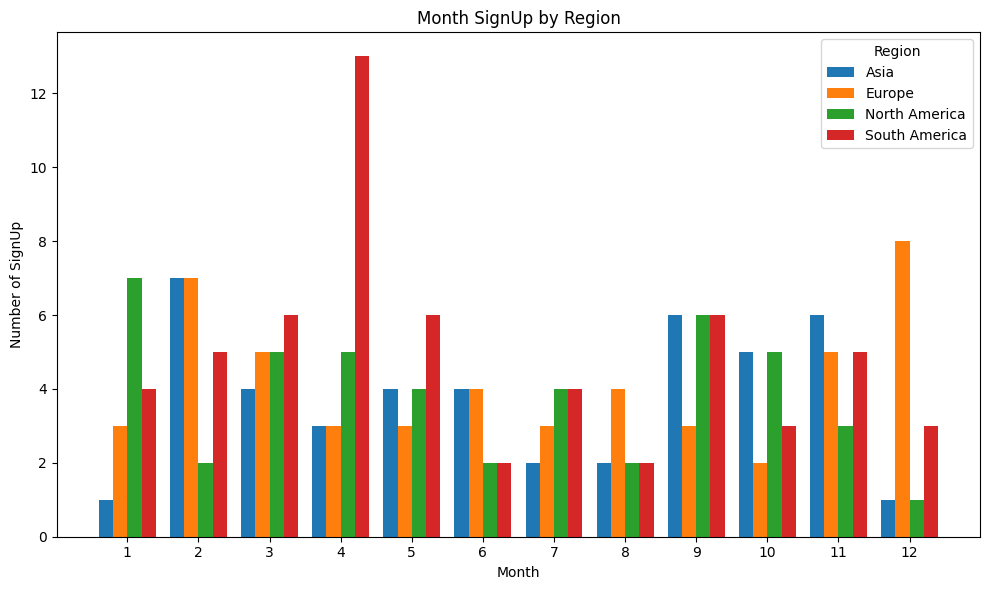

In [268]:
grouped = customer.groupby(['Region', 'SignUp_month']).size().unstack(fill_value=0)

all_months = range(1, 13)
grouped = grouped.reindex(columns=all_months, fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  
x = np.arange(len(all_months))  

for i, country in enumerate(grouped.index):
    ax.bar(x + i * width, grouped.loc[country], width, label=country)

ax.set_title('Month SignUp by Region')
ax.set_xlabel('Month')
ax.set_ylabel('Number of SignUp')
ax.set_xticks(x + width * (len(grouped.index) - 1) / 2) 
ax.set_xticklabels(all_months)
ax.legend(title='Region')
plt.tight_layout()

In [269]:
products = pd.read_csv('Products.csv')

In [270]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Home Decor')])

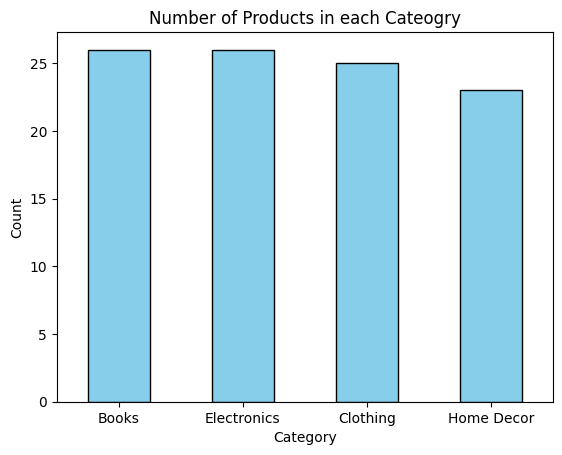

In [271]:
category = products['Category'].value_counts()
category.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Products in each Cateogry')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [272]:
products['Price'].describe()

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

In [273]:
min_price_row = products.loc[products['Price'].idxmin()]
print(min_price_row)

ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price                         16.08
Name: 55, dtype: object


In [274]:
max_price_row = products.loc[products['Price'].idxmax()]
print(max_price_row)

ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price                    497.76
Name: 74, dtype: object


In [275]:
average_price_per_category = products.groupby('Category')['Price'].mean()
print(average_price_per_category)

Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64


In [276]:
transactions = pd.read_csv('Transactions.csv')

In [277]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [278]:
transaction_date = pd.to_datetime(transactions['TransactionDate'])
transactions['transaction_month'] = transaction_date.dt.month
transactions['transaction_year'] = transaction_date.dt.year

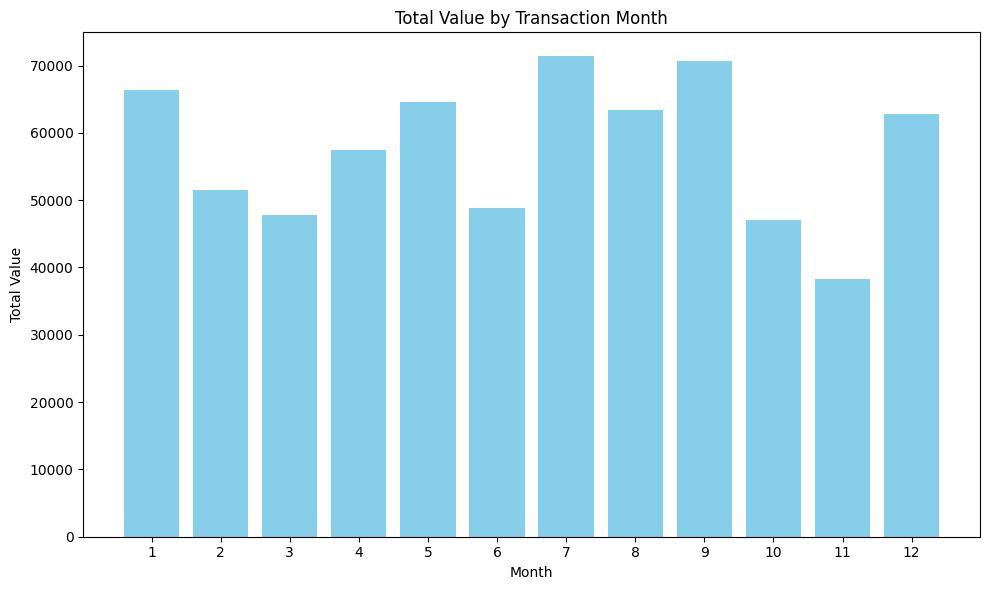

In [279]:
monthly_sum = transactions.groupby('transaction_month')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_sum['transaction_month'], monthly_sum['TotalValue'], color='skyblue')

plt.title('Total Value by Transaction Month')
plt.xlabel('Month')
plt.ylabel('Total Value')

plt.xticks(monthly_sum['transaction_month'])  
plt.tight_layout() 

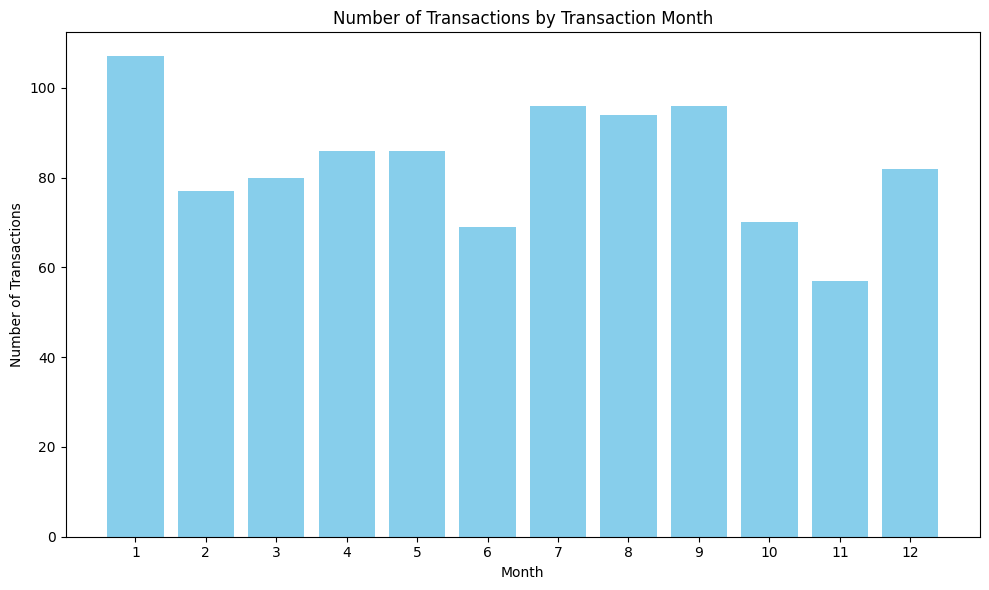

In [280]:
monthly_count = transactions.groupby('transaction_month').size().reset_index(name='Number of Transactions')

plt.figure(figsize=(10, 6))
plt.bar(monthly_count['transaction_month'], monthly_count['Number of Transactions'], color='skyblue')

plt.title('Number of Transactions by Transaction Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

plt.xticks(monthly_count['transaction_month'])  
plt.tight_layout()  

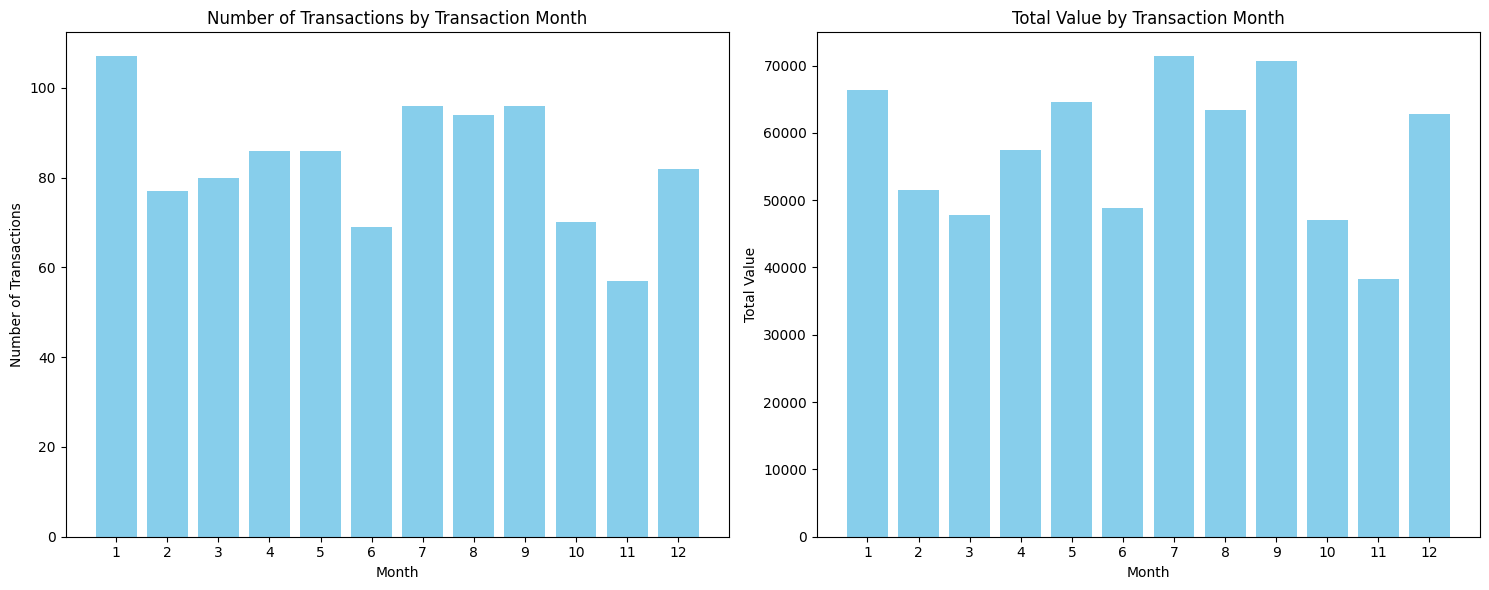

In [281]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].bar(monthly_count['transaction_month'], monthly_count['Number of Transactions'], color='skyblue')
ax[0].set_title('Number of Transactions by Transaction Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Transactions')
ax[0].set_xticks(monthly_count['transaction_month'])

ax[1].bar(monthly_sum['transaction_month'], monthly_sum['TotalValue'], color='skyblue')
ax[1].set_title('Total Value by Transaction Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Value')
ax[1].set_xticks(monthly_sum['transaction_month'])

plt.tight_layout()

   transaction_year  TotalValue
0              2023     3769.52
1              2024   686226.04


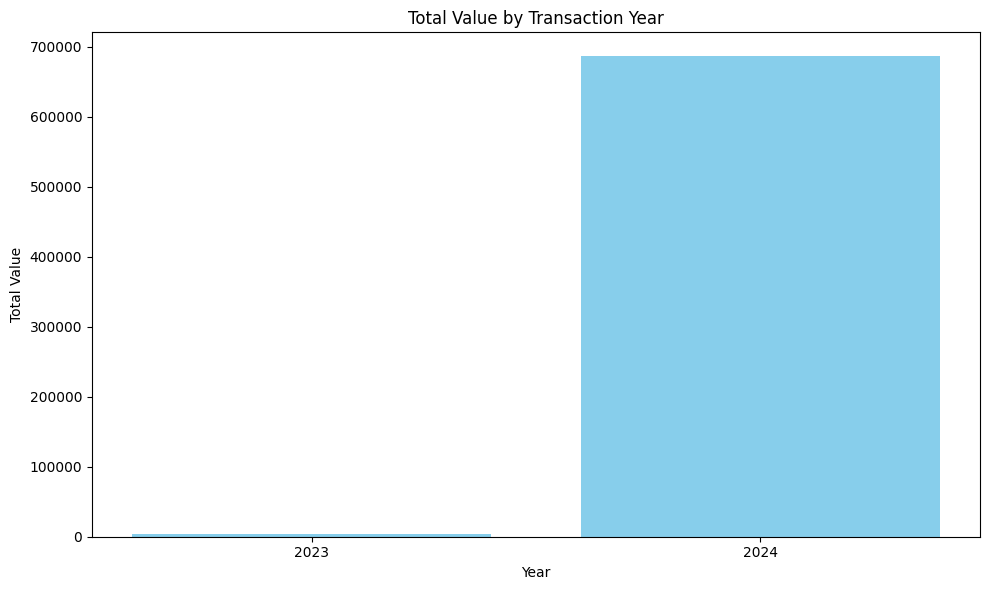

In [282]:
monthly_sum = transactions.groupby('transaction_year')['TotalValue'].sum().reset_index()
print(monthly_sum)
plt.figure(figsize=(10, 6))
plt.bar(monthly_sum['transaction_year'], monthly_sum['TotalValue'], color='skyblue')

plt.title('Total Value by Transaction Year')
plt.xlabel('Year')
plt.ylabel('Total Value')

# Show plot
plt.xticks(monthly_sum['transaction_year'])  
plt.tight_layout()  

In [283]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['Hour'] = transactions['TransactionDate'].dt.hour

def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

transactions['TimePeriod'] = transactions['Hour'].apply(categorize_time)

time_period_counts = transactions.groupby('TimePeriod').size().reset_index(name='TransactionCount')

print(time_period_counts)

  TimePeriod  TransactionCount
0  Afternoon               261
1    Evening               250
2    Morning               248
3      Night               241


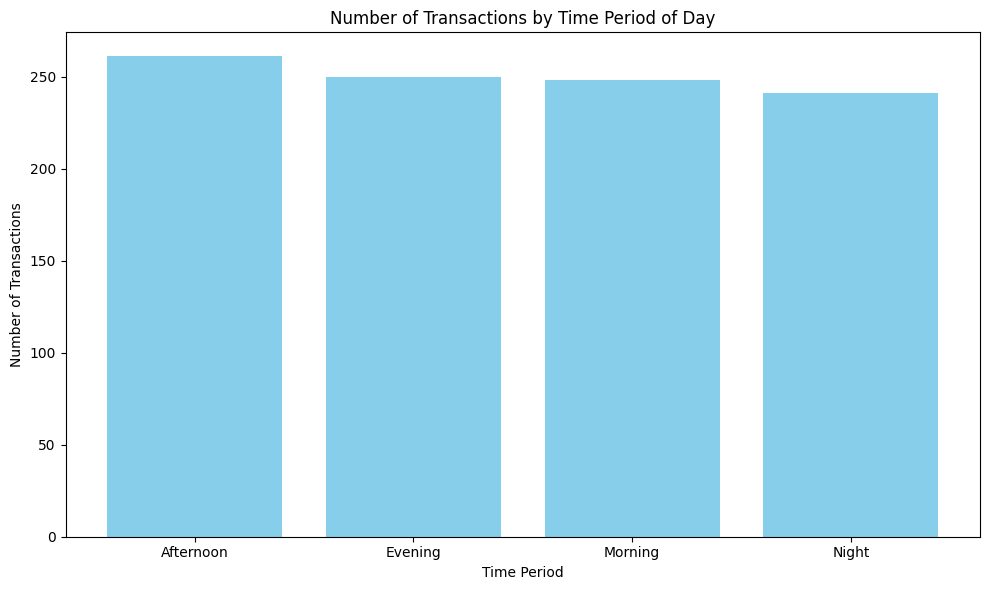

In [284]:
plt.figure(figsize=(10, 6))
plt.bar(time_period_counts['TimePeriod'], time_period_counts['TransactionCount'], color='skyblue')

plt.title('Number of Transactions by Time Period of Day')
plt.xlabel('Time Period')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

In [285]:
merged_csv = pd.merge(customer,transactions, on='CustomerID', how='inner')
product_selected = products[['ProductID','Category','ProductName']]
final_csv = pd.merge(merged_csv, product_selected, on='ProductID', how = 'inner')

In [286]:
final_csv.head()

,CustomerID,CustomerName,Region,SignupDate,SignUp_month,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,transaction_month,transaction_year,Hour,TimePeriod,Category,ProductName
0,C0001,Lawrence Carroll,South America,2022-07-10,7,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,1,2024,3,Night,Books,SoundWave Cookbook
1,C0001,Lawrence Carroll,South America,2022-07-10,7,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,9,2024,9,Morning,Home Decor,HomeSense Wall Art
2,C0001,Lawrence Carroll,South America,2022-07-10,7,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,4,2024,0,Night,Electronics,SoundWave Headphones
3,C0001,Lawrence Carroll,South America,2022-07-10,7,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,5,2024,3,Night,Electronics,ActiveWear Smartwatch
4,C0001,Lawrence Carroll,South America,2022-07-10,7,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,11,2024,17,Afternoon,Electronics,TechPro Headphones


          Region  TotalValue_Sum  TotalValue_Avg
0           Asia       152074.97      697.591606
1         Europe       166254.63      710.489872
2  North America       152313.40      624.235246
3  South America       219352.56      721.554474


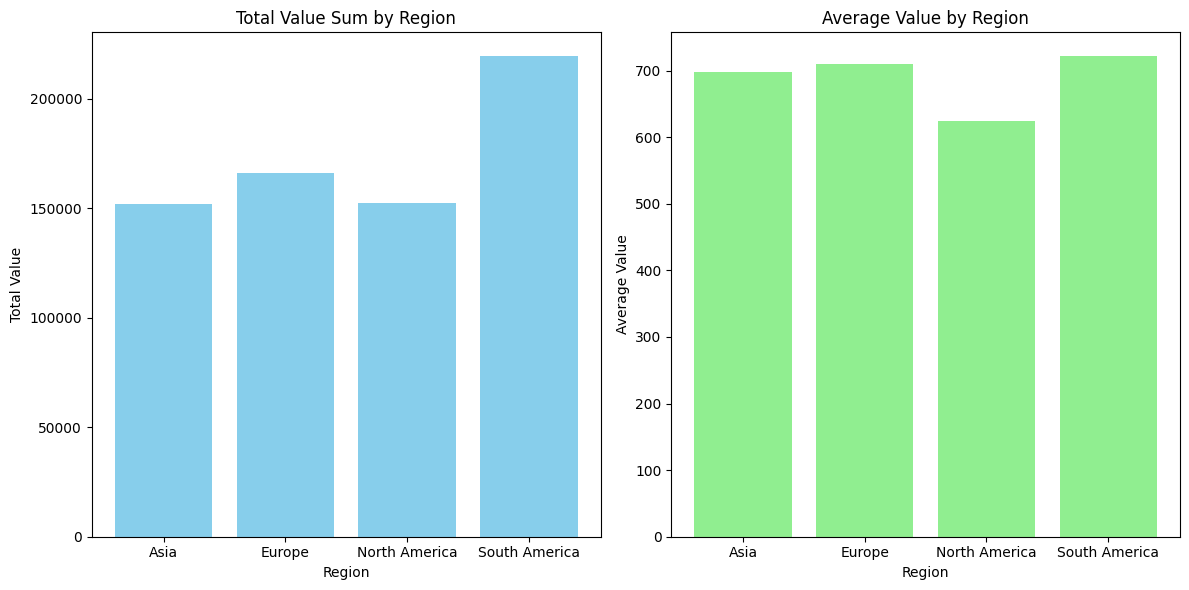

In [287]:
result = final_csv.groupby('Region').agg(
    TotalValue_Sum=('TotalValue', 'sum'),
    TotalValue_Avg=('TotalValue', 'mean')
).reset_index()

print(result)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(result['Region'], result['TotalValue_Sum'], color='skyblue')
ax1.set_title('Total Value Sum by Region')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Value')

ax2.bar(result['Region'], result['TotalValue_Avg'], color='lightgreen')
ax2.set_title('Average Value by Region')
ax2.set_xlabel('Region')
ax2.set_ylabel('Average Value')

plt.tight_layout()
plt.show()

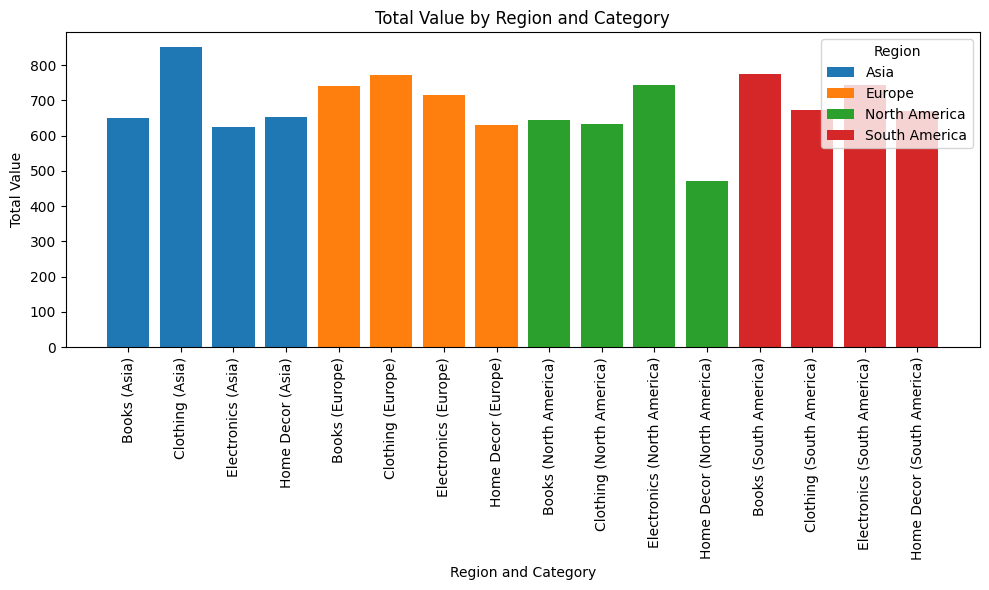

In [288]:
region_category_sum = final_csv.groupby(['Region', 'Category'])['TotalValue'].mean().reset_index()
plt.figure(figsize=(10, 6))
for label, df in region_category_sum.groupby('Region'):
    plt.bar(df['Category'] + ' (' + label + ')', df['TotalValue'], label=label)

plt.title('Total Value by Region and Category')
plt.xlabel('Region and Category')
plt.ylabel('Total Value')
plt.xticks(rotation=90)  

plt.legend(title='Region')
plt.tight_layout()

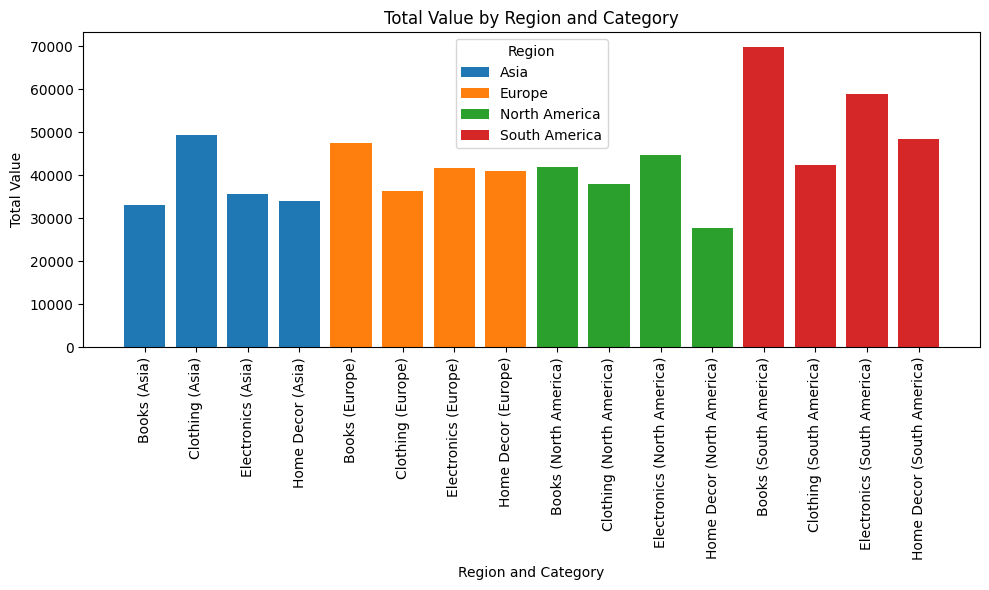

In [289]:
region_category_sum = final_csv.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
for label, df in region_category_sum.groupby('Region'):
    plt.bar(df['Category'] + ' (' + label + ')', df['TotalValue'], label=label)

plt.title('Total Value by Region and Category')
plt.xlabel('Region and Category')
plt.ylabel('Total Value')
plt.xticks(rotation=90)  

plt.legend(title='Region')
plt.tight_layout()

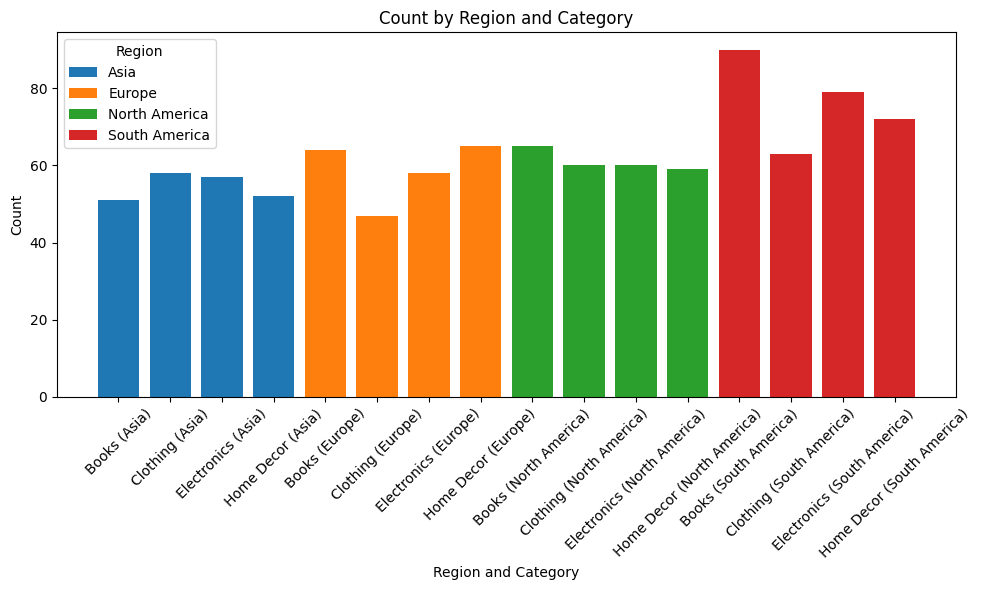

In [290]:
region_category_count = final_csv.groupby(['Region', 'Category']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
for label, df in region_category_count.groupby('Region'):
    plt.bar(df['Category'] + ' (' + label + ')', df['Count'], label=label)

plt.title('Count by Region and Category')
plt.xlabel('Region and Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Region')
plt.tight_layout()

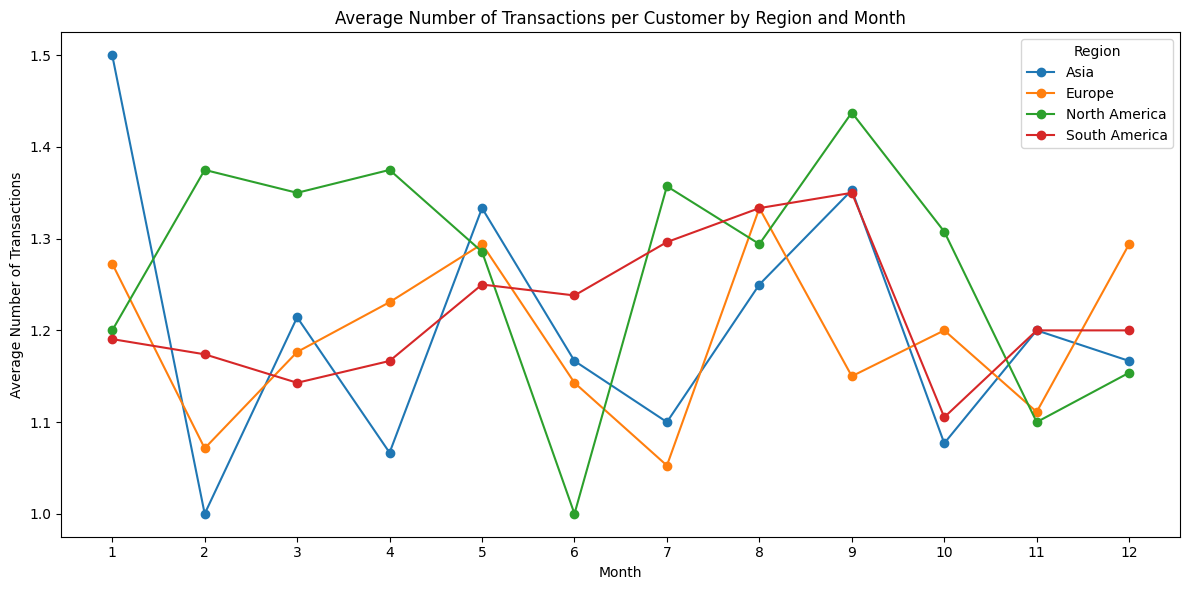

In [291]:
monthly_customer_transactions = final_csv.groupby(['Region', 'transaction_month', 'CustomerID']).size().reset_index(name='TransactionCount')

average_transactions = monthly_customer_transactions.groupby(['Region', 'transaction_month'])['TransactionCount'].mean().reset_index(name='AverageTransactions')

plt.figure(figsize=(12, 6))

for region in average_transactions['Region'].unique():
    region_data = average_transactions[average_transactions['Region'] == region]
    plt.plot(region_data['transaction_month'], region_data['AverageTransactions'], label=region, marker='o')

plt.title('Average Number of Transactions per Customer by Region and Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Transactions')
plt.legend(title='Region')
plt.xticks(range(1, 13))
plt.tight_layout()  

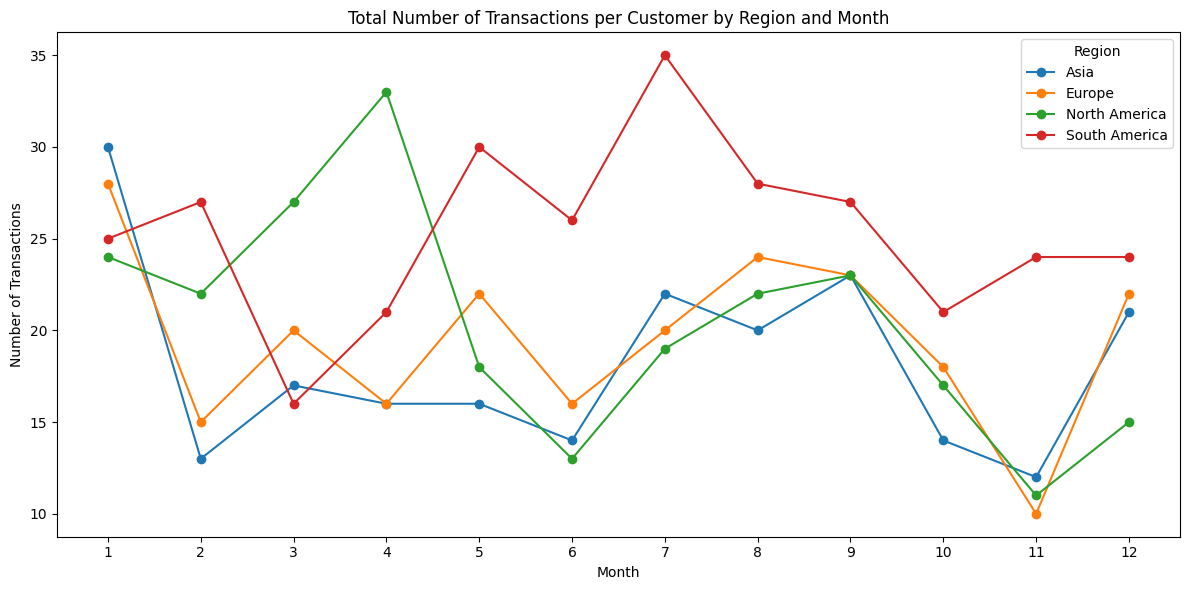

In [292]:
monthly_customer_transactions = final_csv.groupby(['Region', 'transaction_month', 'CustomerID']).size().reset_index(name='TransactionCount')

average_transactions = monthly_customer_transactions.groupby(['Region', 'transaction_month'])['TransactionCount'].sum().reset_index(name='AverageTransactions')

plt.figure(figsize=(12, 6))

for region in average_transactions['Region'].unique():
    region_data = average_transactions[average_transactions['Region'] == region]
    plt.plot(region_data['transaction_month'], region_data['AverageTransactions'], label=region, marker='o')

plt.title('Total Number of Transactions per Customer by Region and Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Region')
plt.xticks(range(1, 13))  
plt.tight_layout()  

In [293]:
grouped = final_csv.groupby(['TransactionID', 'CustomerID', 'ProductID','Category']).agg({'Quantity': 'sum'}).reset_index()

total_quantity_per_customer = grouped.groupby(['CustomerID', 'ProductID', 'Category']).agg({'Quantity': 'sum', 'TransactionID': 'nunique'}).reset_index()

total_quantity_per_customer['AvgQuantityPerTransaction'] = total_quantity_per_customer['Quantity'] / total_quantity_per_customer['TransactionID']

multiple_purchases = total_quantity_per_customer[total_quantity_per_customer['TransactionID'] > 1]

print(multiple_purchases['Category'].value_counts())

Category
Clothing       10
Home Decor      7
Electronics     5
Books           3
Name: count, dtype: int64


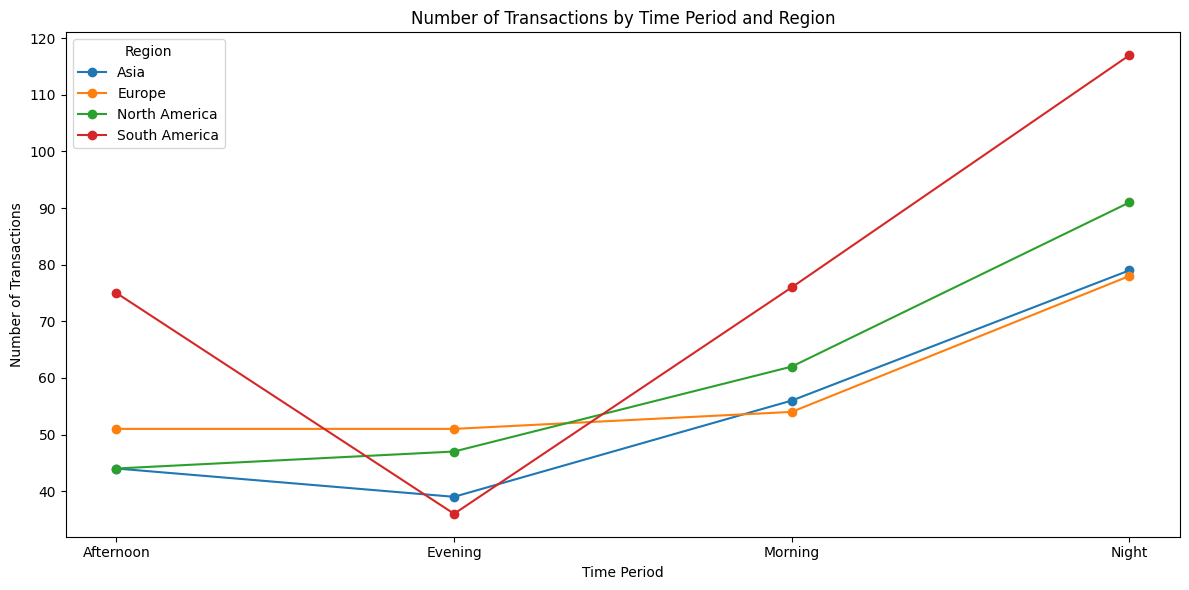

In [294]:
final_csv['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

final_csv['hour'] = final_csv['TransactionDate'].dt.hour

def get_time_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

final_csv['TimePeriod'] = final_csv['hour'].apply(get_time_period)

transaction_counts = final_csv.groupby(['Region', 'TimePeriod']).size().reset_index(name='TransactionCount')

plt.figure(figsize=(12, 6))

for region in transaction_counts['Region'].unique():
    region_data = transaction_counts[transaction_counts['Region'] == region]
    plt.plot(region_data['TimePeriod'], region_data['TransactionCount'], label=region, marker='o')

plt.title('Number of Transactions by Time Period and Region')
plt.xlabel('Time Period')
plt.ylabel('Number of Transactions')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [295]:
final_csv

,CustomerID,CustomerName,Region,SignupDate,SignUp_month,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,transaction_month,transaction_year,Hour,TimePeriod,Category,ProductName,hour
0,C0001,Lawrence Carroll,South America,2022-07-10,7,T00015,P054,2024-08-25 12:38:23,2,114.60,57.30,1,2024,3,Afternoon,Books,SoundWave Cookbook,12
1,C0001,Lawrence Carroll,South America,2022-07-10,7,T00932,P022,2024-05-27 22:23:54,3,412.62,137.54,9,2024,9,Night,Home Decor,HomeSense Wall Art,22
2,C0001,Lawrence Carroll,South America,2022-07-10,7,T00085,P096,2024-04-25 07:38:55,2,614.94,307.47,4,2024,0,Morning,Electronics,SoundWave Headphones,7
3,C0001,Lawrence Carroll,South America,2022-07-10,7,T00445,P083,2024-03-26 22:55:37,2,911.44,455.72,5,2024,3,Night,Electronics,ActiveWear Smartwatch,22
4,C0001,Lawrence Carroll,South America,2022-07-10,7,T00436,P029,2024-03-21 15:10:10,3,1300.92,433.64,11,2024,17,Afternoon,Electronics,TechPro Headphones,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,6,T00518,P034,2024-10-24 08:30:27,4,868.20,217.05,12,2024,3,Morning,Clothing,HomeSense T-Shirt,8
996,C0200,Kelly Cross,Asia,2023-06-11,6,T00091,P057,2024-06-04 02:15:24,1,239.70,239.70,4,2024,19,Night,Electronics,ActiveWear Smartphone,2
997,C0200,Kelly Cross,Asia,2023-06-11,6,T00731,P061,2024-04-05 13:05:32,4,627.84,156.96,7,2024,20,Afternoon,Home Decor,HomeSense Desk Lamp,13
998,C0200,Kelly Cross,Asia,2023-06-11,6,T00771,P048,2024-09-29 10:16:02,4,1665.60,416.40,9,2024,9,Morning,Books,TechPro Cookbook,10
